# Yolov8

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [3]:
!nvidia-smi

Wed Mar  8 00:36:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [1]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/78.2 GB disk)


In [7]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

In [2]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JcYhOML6MnjyaDQ7U2Vs")
project = rf.workspace("w-68qqu").project("cats-dogs-6zm8r")
dataset = project.version(2).download("yolov8")


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cats-dogs-2 in yolov8:: 100%|██████████| 972/972 [00:00<00:00, 2350.97it/s]


## Custom Training

In [4]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
100% 6.23M/6.23M [00:00<00:00, 24.7MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Cats-dogs-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [5]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1678230651.0f5a91bf515b.827.0  train_batch2.jpg
F1_curve.png					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   val_batch1_labels.jpg
R_curve.png					   val_batch1_pred.jpg
results.csv					   weights
results.png


/content


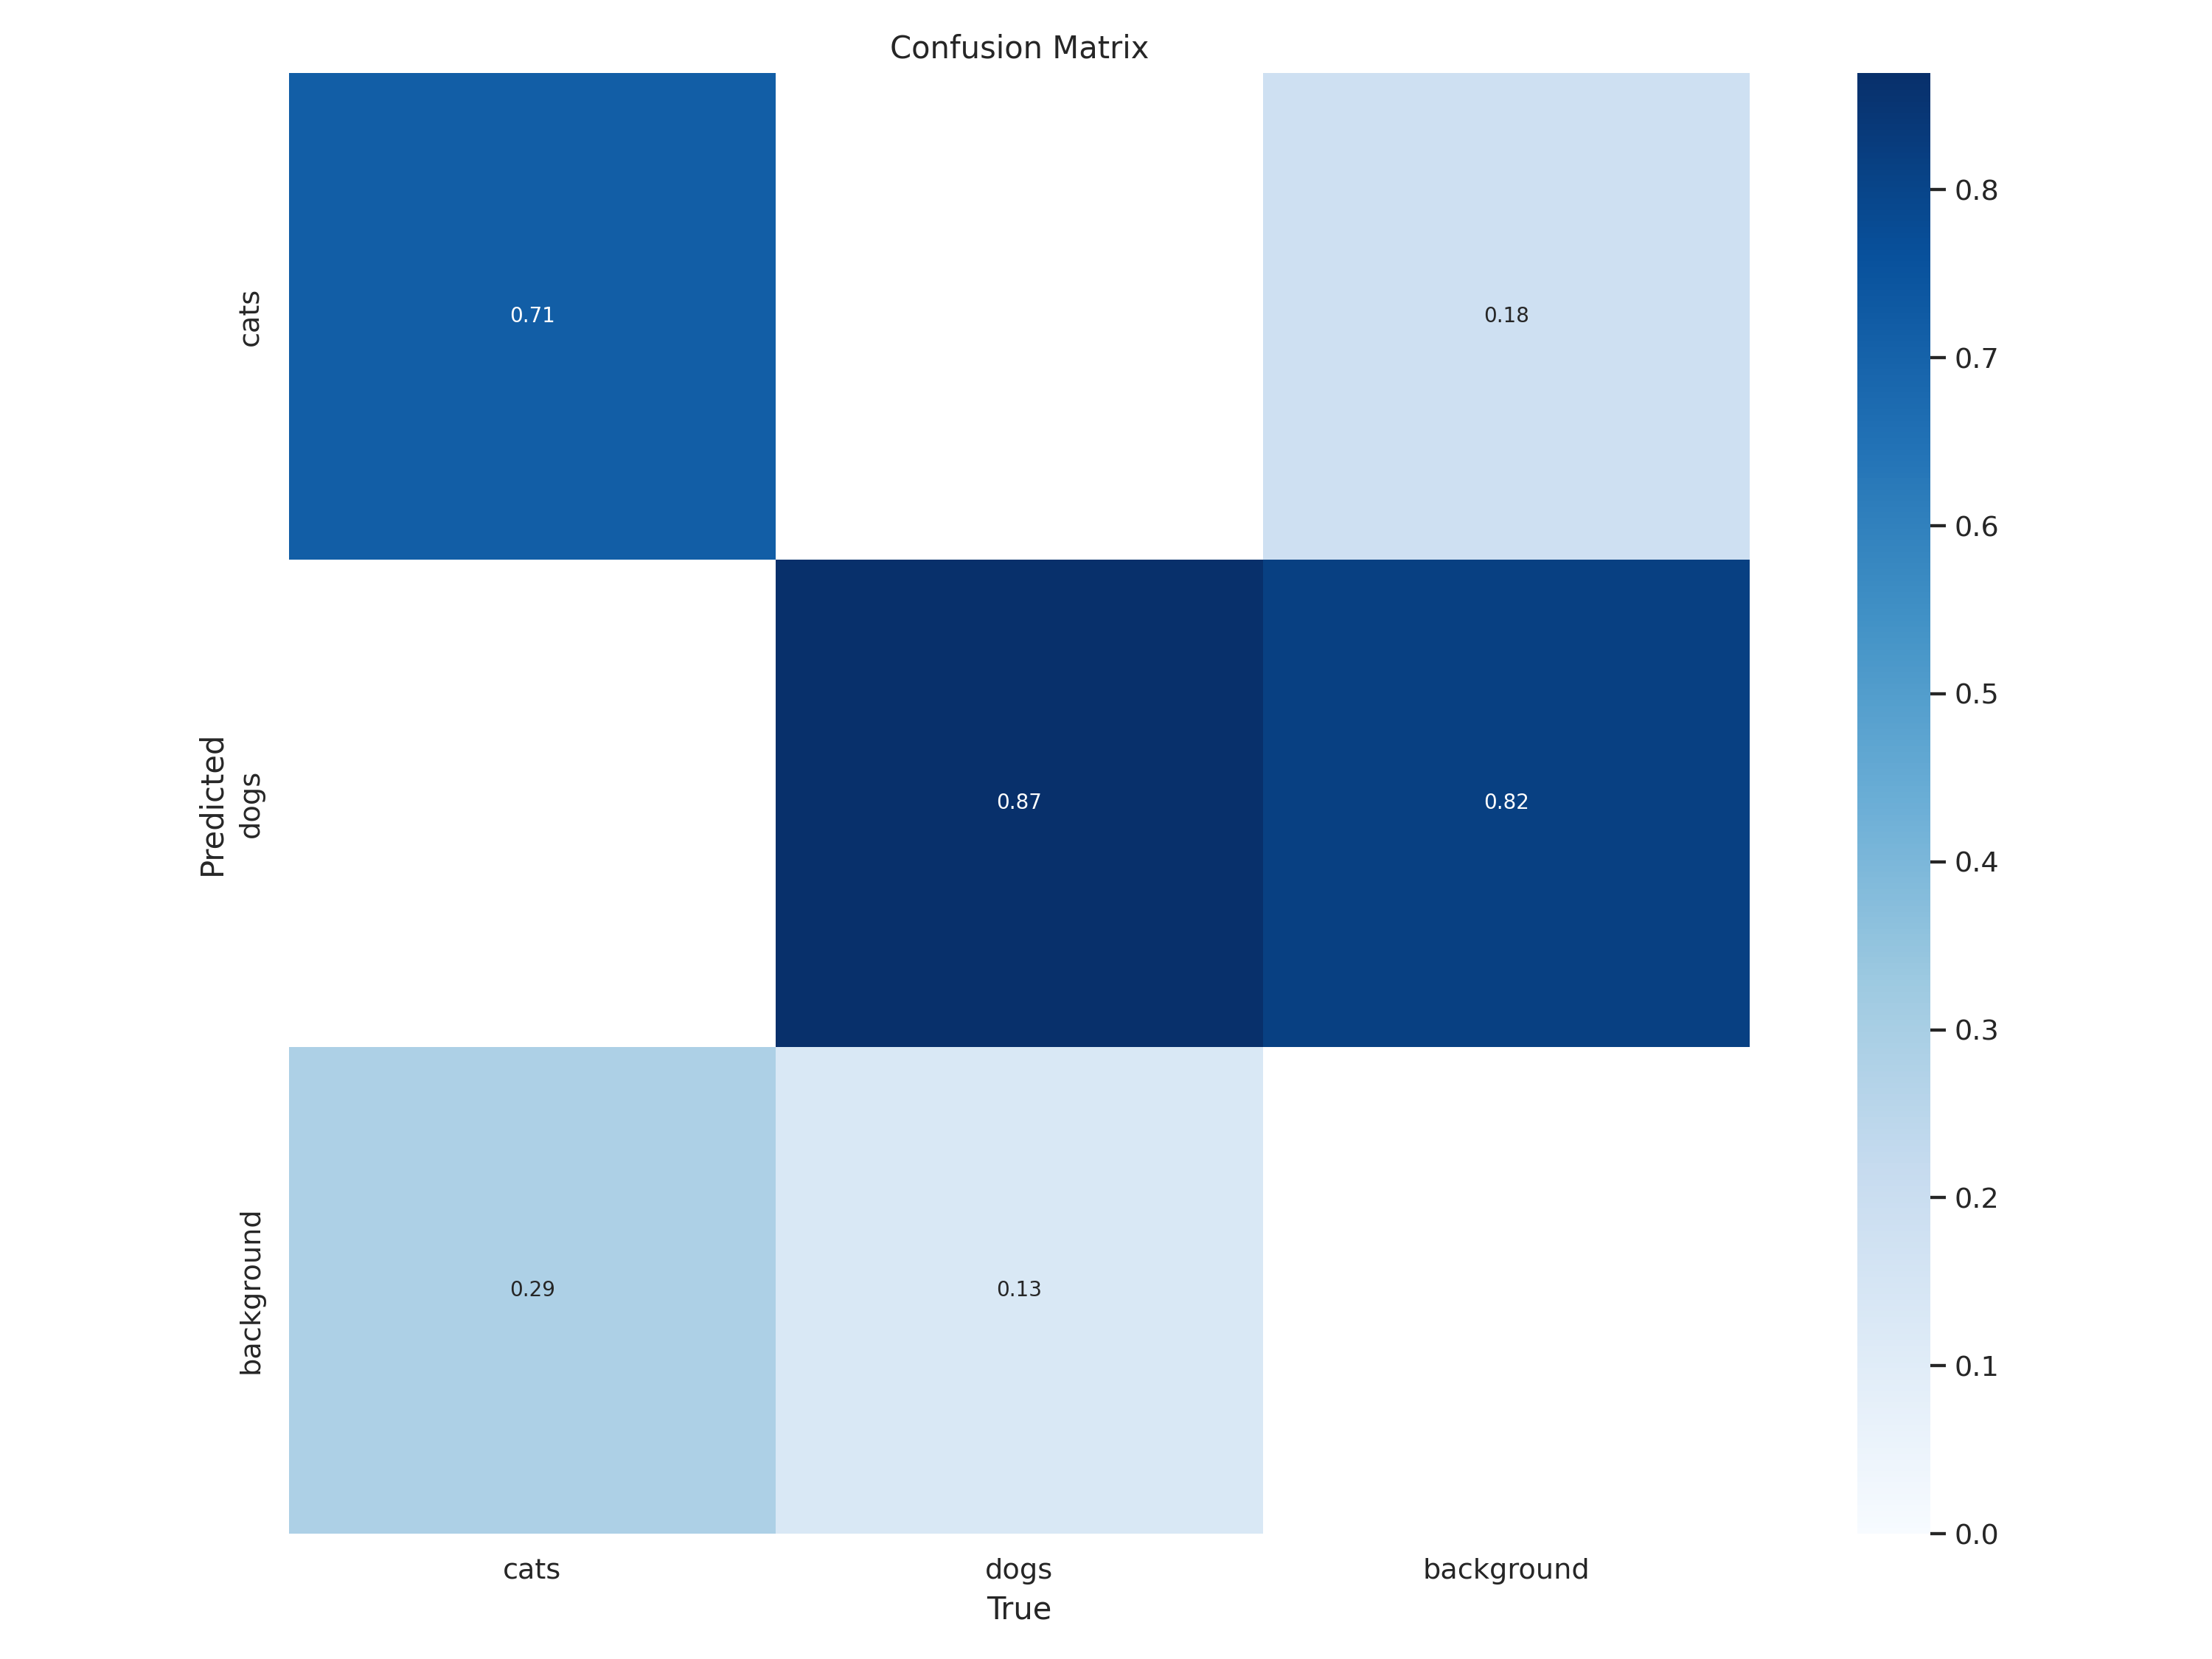

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


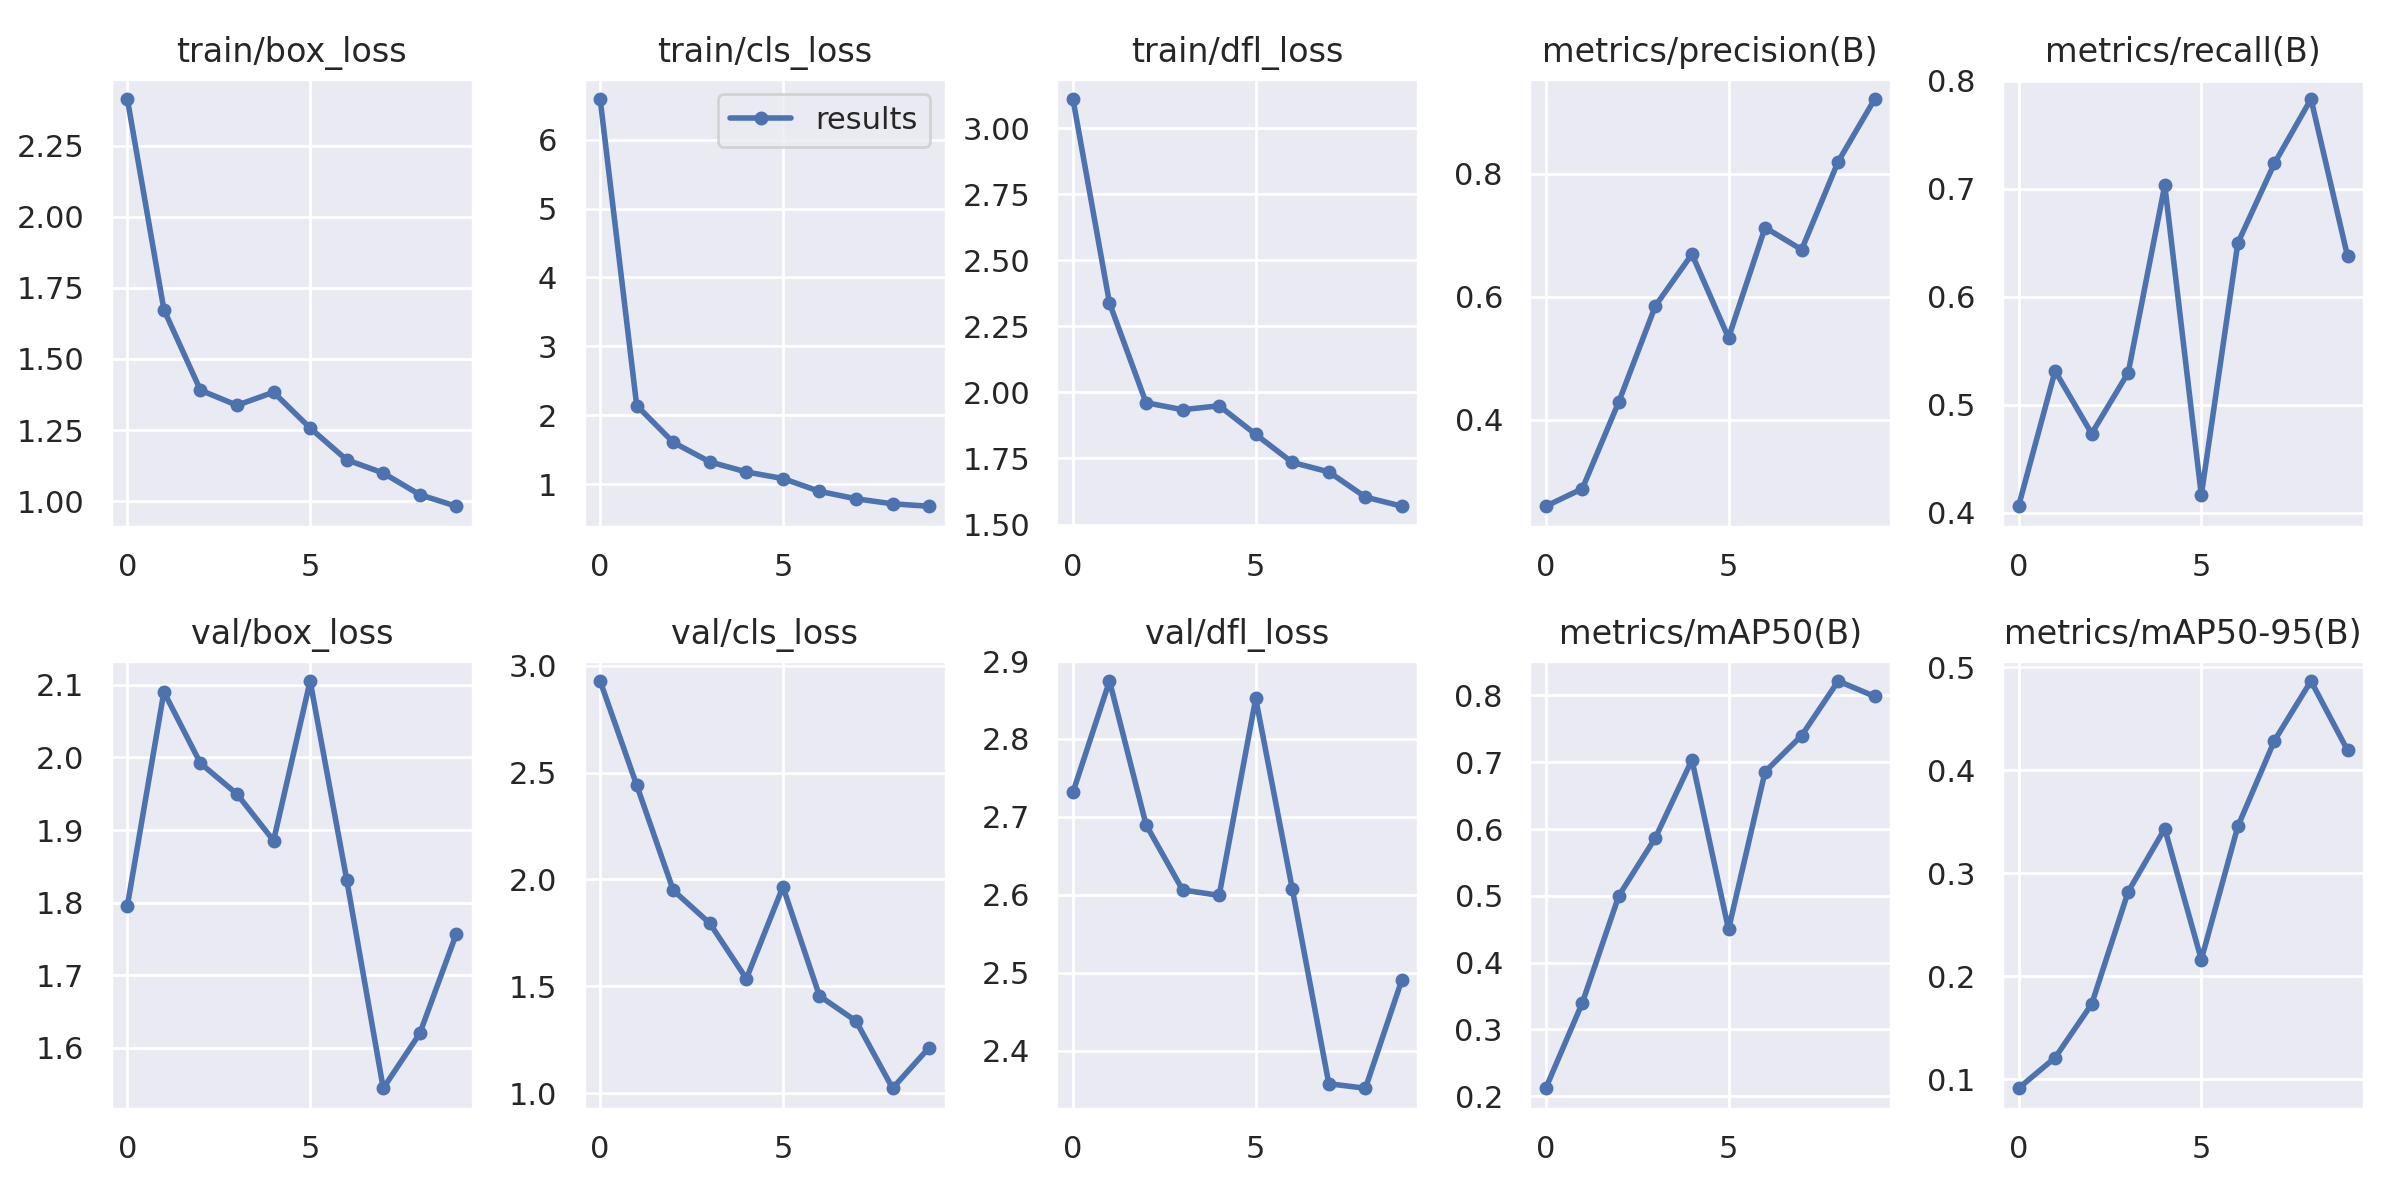

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


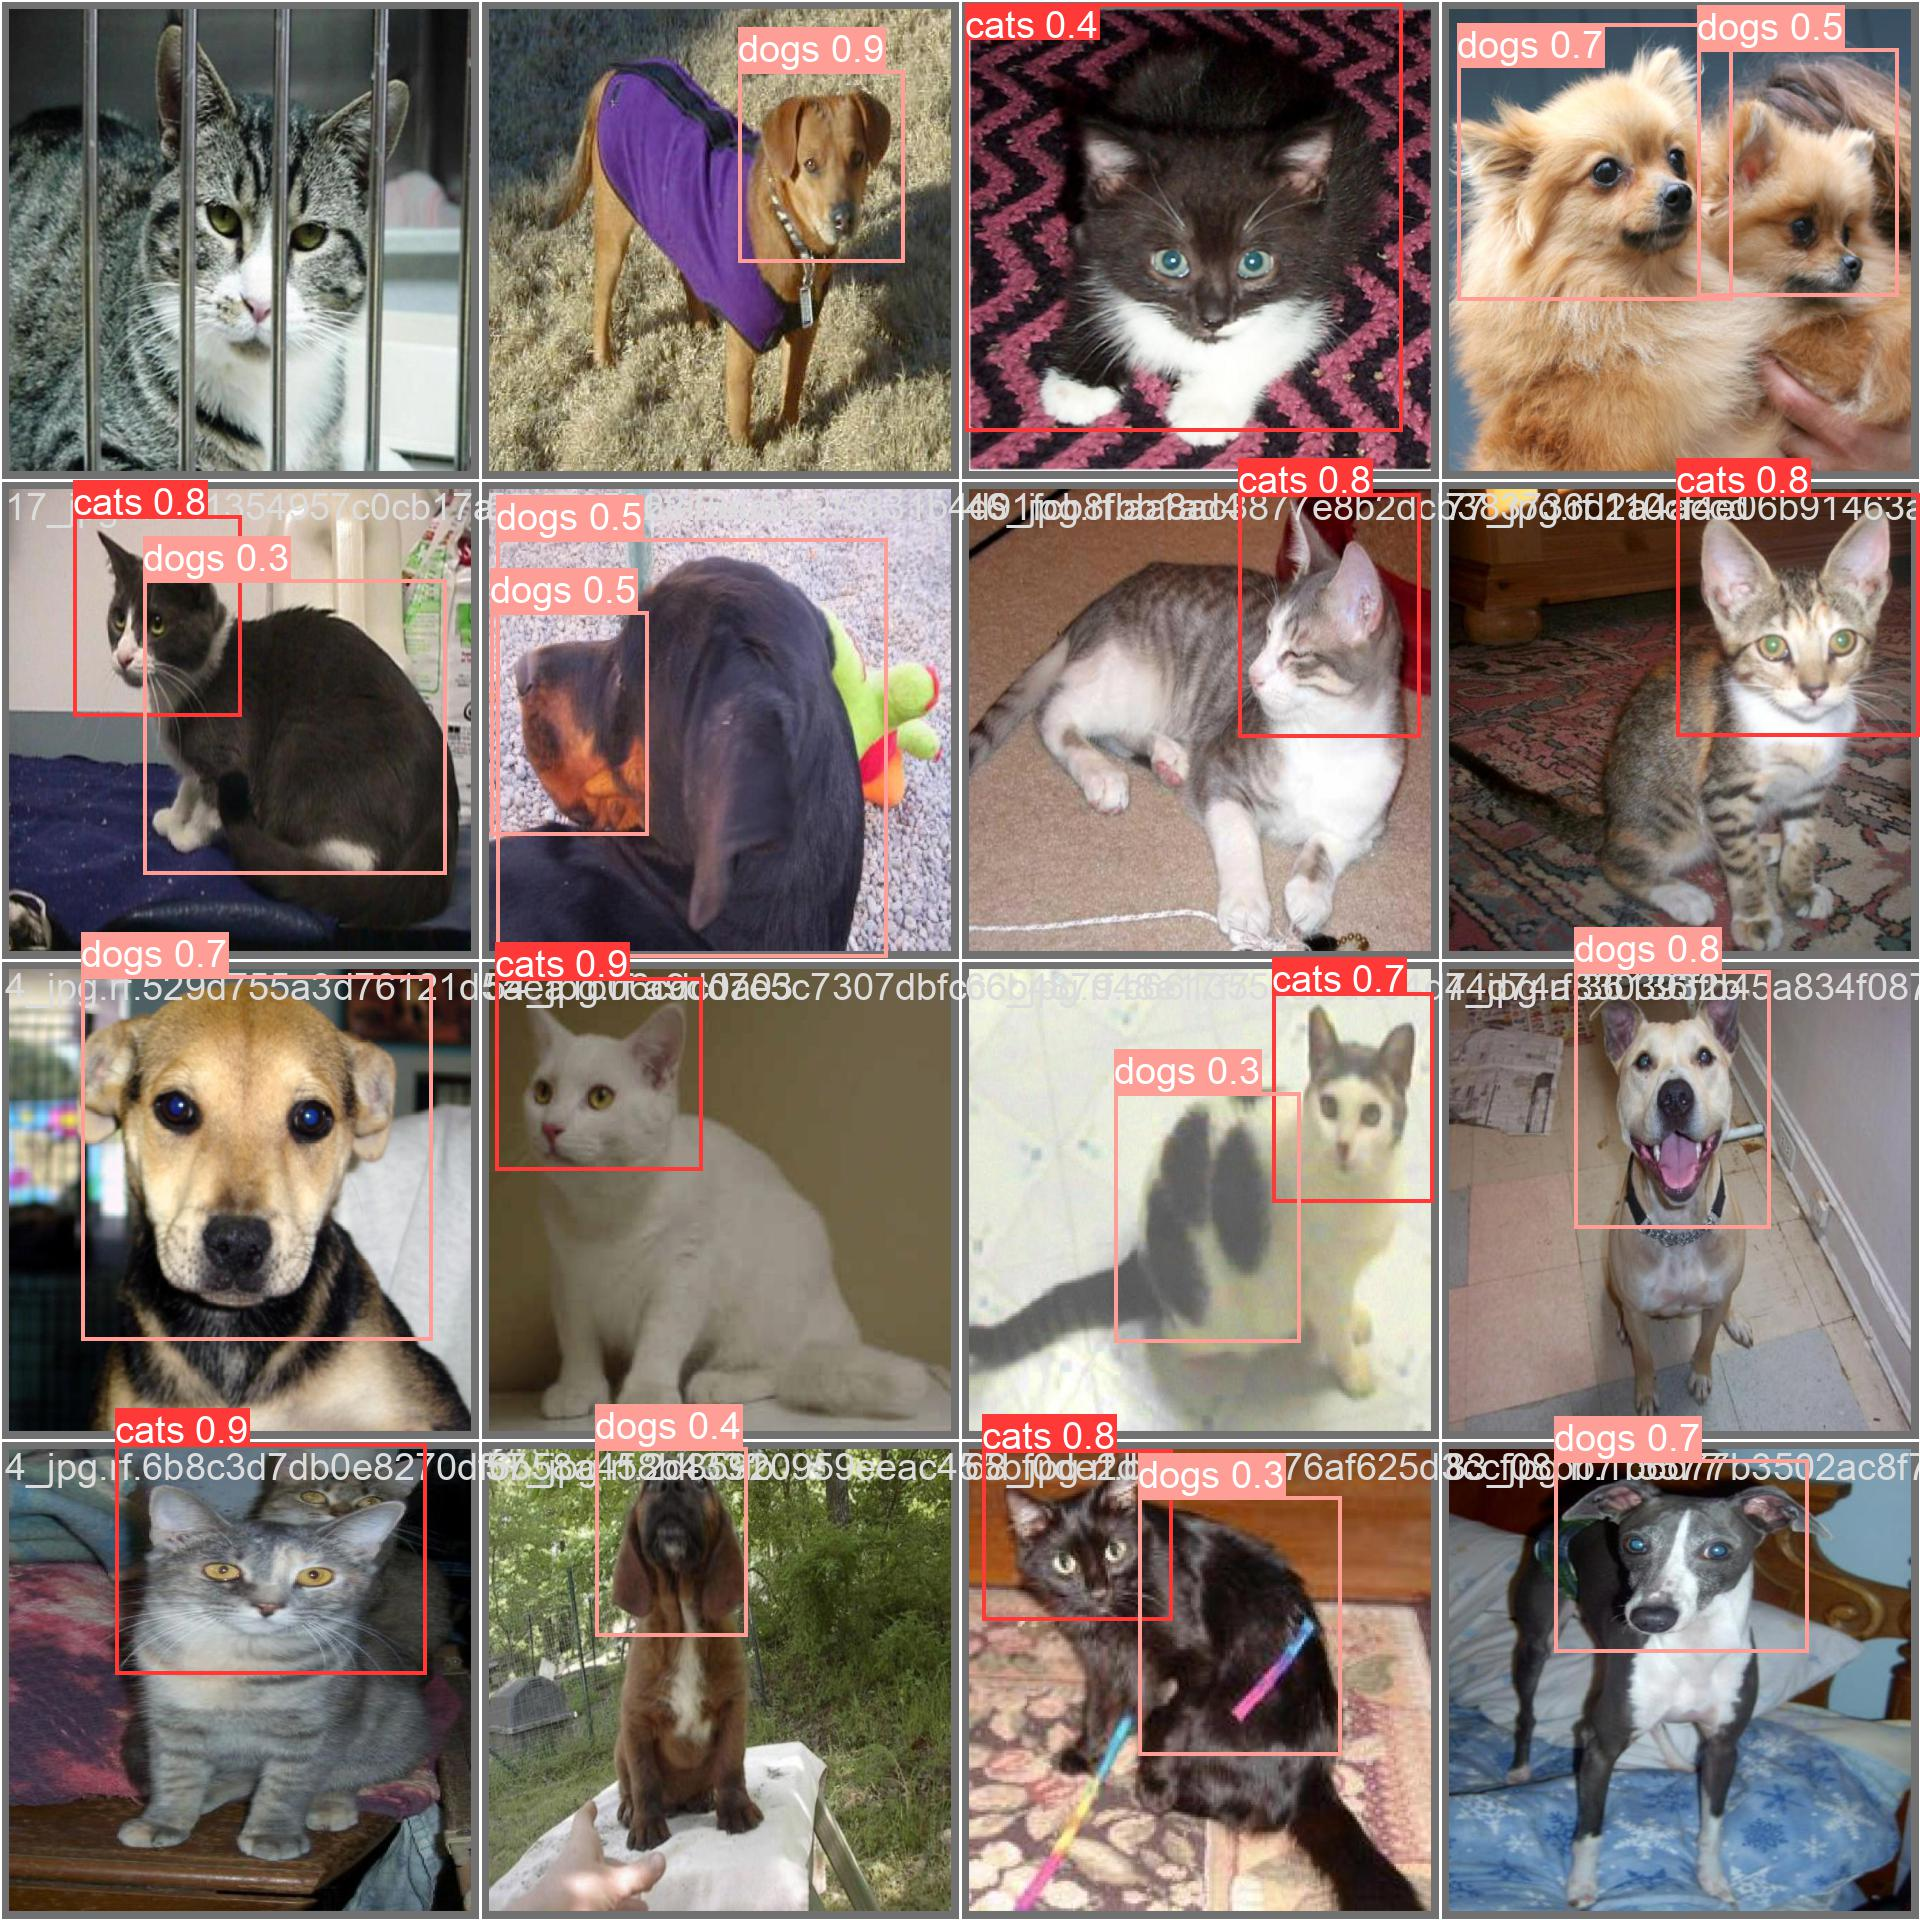

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Cats-dogs-2/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.07s/it]
                   all         40         44       0.82      0.783      0.822      0.487
                  cats         40         21       0.83      0.696      0.768      0.501
                  dogs         40         23       0.81       0.87      0.875      0.473
Speed: 21.7ms pre-process, 15.1ms inference, 0.0ms loss, 2.9ms post-process per image


## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/20 /content/Cats-dogs-2/test/images/0_jpg.rf.3c066f563cdd4a4d6737589bf3c0dbb0.jpg: 800x800 2 dogss, 23.5ms
image 2/20 /content/Cats-dogs-2/test/images/16_jpg.rf.6c8fcd6583ab3b2fcb521e6c81171db9.jpg: 800x800 3 dogss, 23.5ms
image 3/20 /content/Cats-dogs-2/test/images/22_jpg.rf.a9709a98d0a2da87de069bc6b0bd9972.jpg: 800x800 2 dogss, 23.5ms
image 4/20 /content/Cats-dogs-2/test/images/23_jpg.rf.005d991b86690c02a6f2e1446cea40c0.jpg: 800x800 2 dogss, 20.5ms
image 5/20 /content/Cats-dogs-2/test/images/2_jpg.rf.2e4c8dd5ab4352b3590cc58e7fd97d74.jpg: 800x800 1 dogs, 20.5ms
image 6/20 /content/Cats-dogs-2/test/images/47_jpg.rf.1521b13bf92e3cfd96d974e26ddd31ec.jpg: 800x800 1 dogs, 20.4ms
image 7/20 /content/Cats-dogs-2/test/images/54_jpg.rf.4ebb9fdf5e7aedb9777b4917138d6ac7.jpg: 800x800 1 cats, 20.5ms
image 8/20 /cont

**NOTE:** Let's take a look at few results.

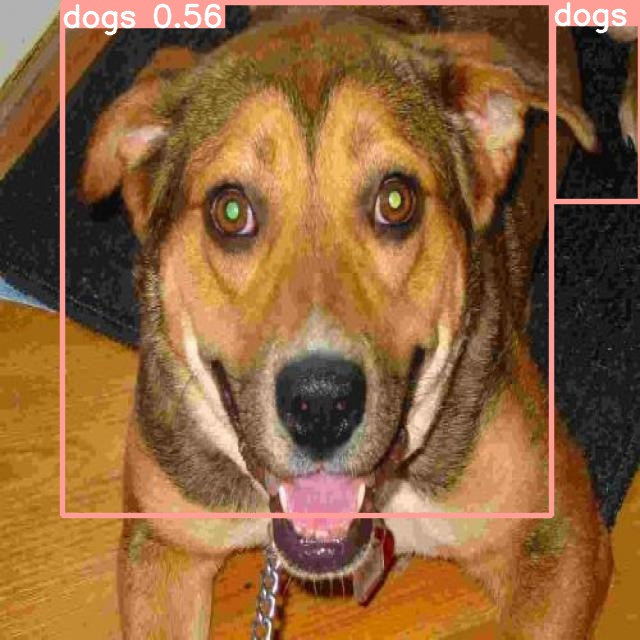

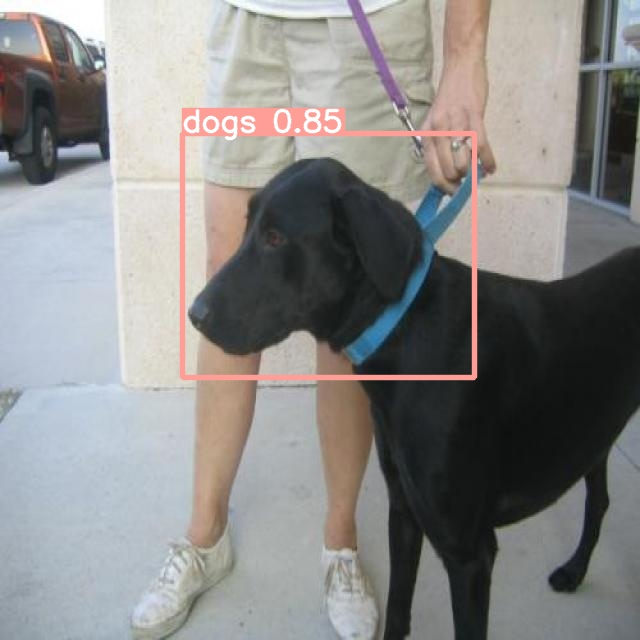

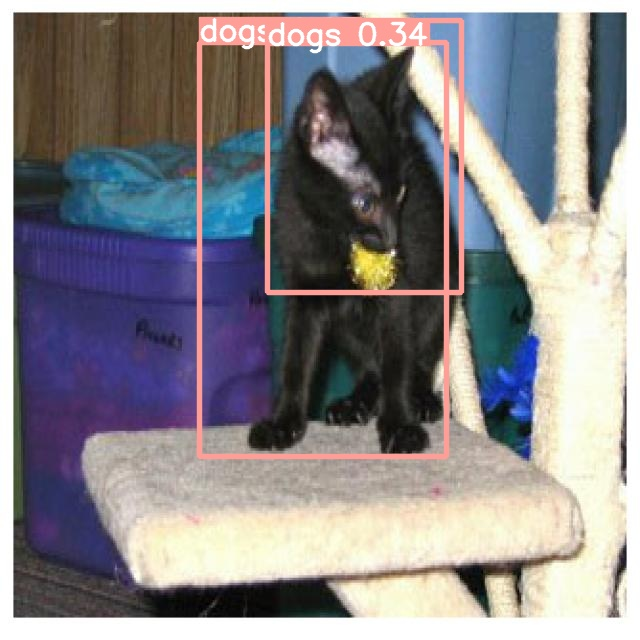

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Faster RCNN using detectron2


In [14]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.8/703.8 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 58.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.0.20 requires torch>=1.7.0, but you have torch 1.5.0+cu101 which is incompatible.
ultralytics 8.0.20 requires torch

In [15]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=75caa1c08e0cf542d8c379713e15b3f55618837b5d3dcd43b8fbc8695a2333c0
  Stored in directory: /root/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd73651e8af175fabbef943043b1cc
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=d7a3d095fc5a07971934eb14b92c68ad998a1fb2b58beaa236d74c16149d1be3
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2e

In [3]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

In [9]:
!curl -L "https://app.roboflow.com/ds/NpSAmw0ooH?key=ZLEDMMvwMk" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0   3097      0 --:--:-- --:--:-- --:--:--  3108
100 21.2M  100 21.2M    0     0  39.6M      0 --:--:-- --:--:-- --:--:--  182M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: test/0_jpg.rf.3c066f563cdd4a4d6737589bf3c0dbb0.jpg  
 extracting: test/16_jpg.rf.6c8fcd6583ab3b2fcb521e6c81171db9.jpg  
 extracting: test/22_jpg.rf.a9709a98d0a2da87de069bc6b0bd9972.jpg  
 extracting: test/23_jpg.rf.005d991b86690c02a6f2e1446cea40c0.jpg  
 extracting: test/2_jpg.rf.2e4c8dd5ab4352b3590cc58e7fd97d74.jpg  
 extracting: test/47_jpg.rf.1521b13bf92e3cfd96d974e26ddd31ec.jpg  
 extracting: test/54_jpg.rf.4ebb9fdf5e7aedb9777b4917138d6ac7.jpg  
 extracting: test/70_jpg.rf.edd17b8ed5bff05c09b5c9

In [1]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")


WARNING [03/07 23:22:16 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/07 23:22:16 d2.data.datasets.coco]: Loaded 420 images in COCO format from /content/train/_annotations.coco.json


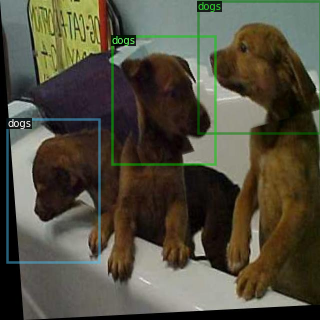

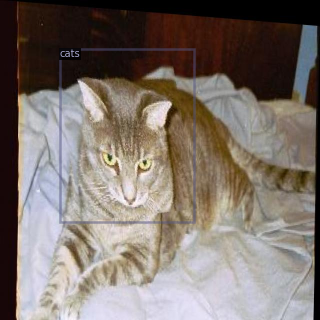

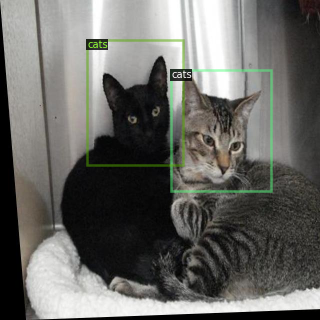

In [4]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [5]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [10]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 300
cfg.SOLVER.MAX_ITER = 600  #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (300, 600)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/07 23:46:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[03/07 23:46:09 d2.engine.train_loop]: Starting training from iteration 0
[03/07 23:46:51 d2.utils.events]:  eta: 0:20:45  iter: 19  total_loss: 2.164  loss_cls: 1.261  loss_box_reg: 0.892  loss_rpn_cls: 0.018  loss_rpn_loc: 0.008  time: 2.1220  data_time: 0.0417  lr: 0.000064  max_mem: 7607M
[03/07 23:47:31 d2.utils.events]:  eta: 0:19:05  iter: 39  total_loss: 1.619  loss_cls: 0.665  loss_box_reg: 0.881  loss_rpn_cls: 0.018  loss_rpn_loc: 0.007  time: 2.0681  data_time: 0.0145  lr: 0.000131  max_mem: 7607M
[03/07 23:48:12 d2.utils.events]:  eta: 0:18:24  iter: 59  total_loss: 1.299  loss_cls: 0.449  loss_box_reg: 0.859  loss_rpn_cls: 0.008  loss_rpn_loc: 0.007  time: 2.0537  data_time: 0.0145  lr: 0.000197  max_mem: 7607M
[03/07 23:48:50 d2.utils.events]:  eta: 0:17:34  iter: 79  total_loss: 1.278  loss_cls: 0.322  loss_box_reg: 0.935  loss_rpn_cls: 0.009  loss_rpn_loc: 0.008  time: 2.0107  data_time: 0.0176  lr: 0.000264  max_mem: 7607M
[03/07 23:49:32 d2.utils.events]:  eta: 0:17:0

In [11]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [03/08 00:06:52 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[03/08 00:06:52 d2.data.datasets.coco]: Loaded 20 images in COCO format from /content/test/_annotations.coco.json
[03/08 00:06:52 d2.data.common]: Serializing 20 elements to byte tensors and concatenating them all ...
[03/08 00:06:52 d2.data.common]: Serialized dataset takes 0.01 MiB
[03/08 00:06:52 d2.evaluation.evaluator]: Start inference on 20 images
[03/08 00:06:55 d2.evaluation.evaluator]: Inference done 11/20. 0.1933 s / img. ETA=0:00:01
[03/08 00:06:57 d2.evaluation.evaluator]: Total inference time: 0:00:03.103636 (0.206909 s / img per device, on 1 devices)
[03/08 00:06:57 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:02 (0.191514 s / img per device, on 1 devices)
[03/08 00:06:57 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/08 00:06:57 d2.evaluation.coco_evaluation]: Saving results to ./output/c

OrderedDict([('bbox',
              {'AP': 54.85713749946424,
               'AP50': 90.81908190819082,
               'AP75': 60.92291371994343,
               'APs': nan,
               'APm': nan,
               'APl': 54.85713749946424,
               'AP-cats-dogs': nan,
               'AP-cats': 63.84441301272984,
               'AP-dogs': 45.86986198619862})])

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

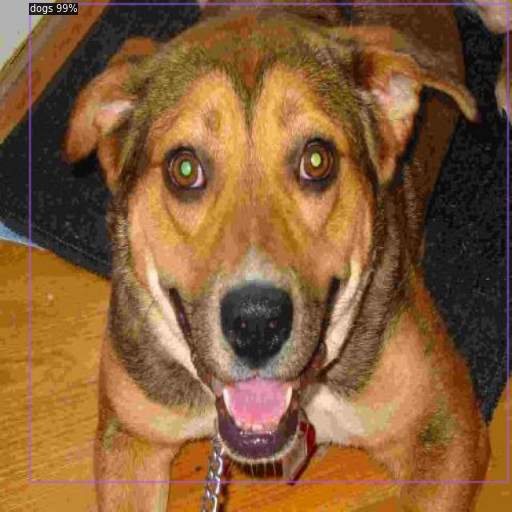

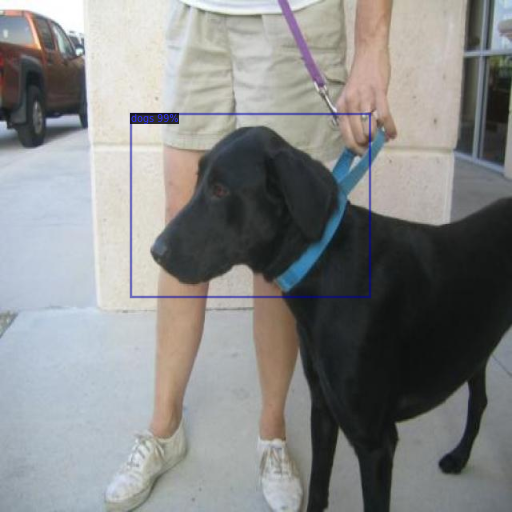

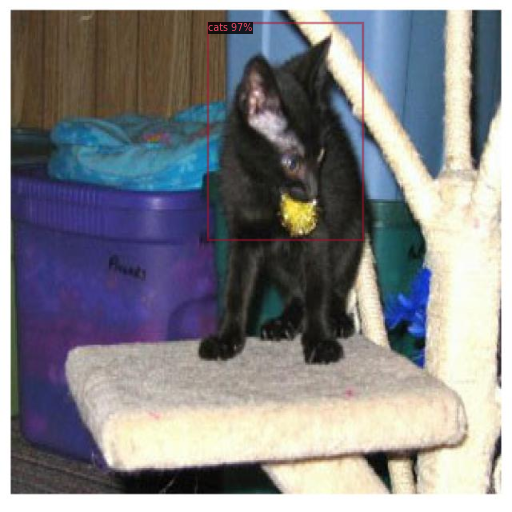

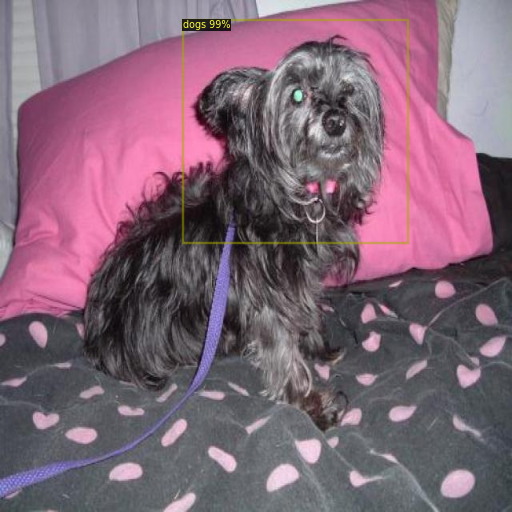

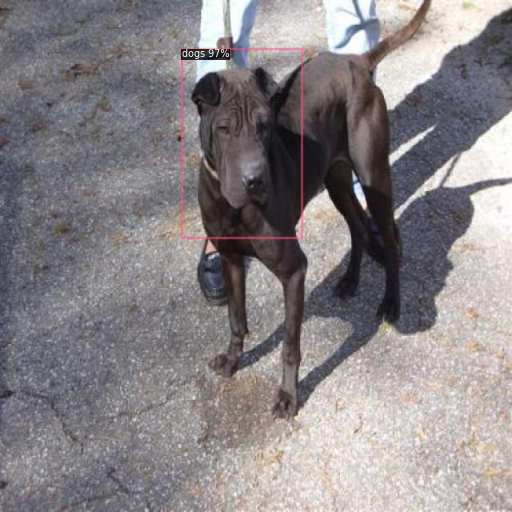

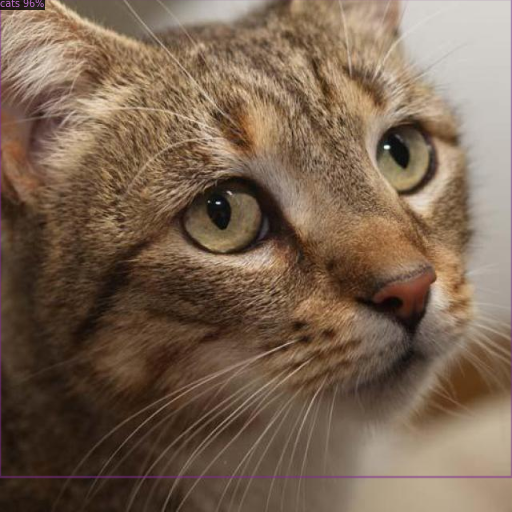

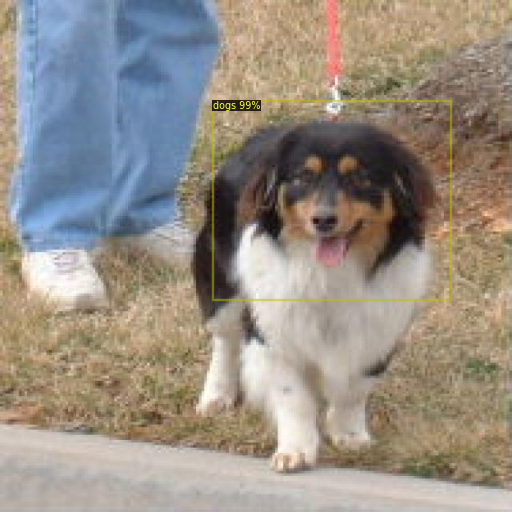

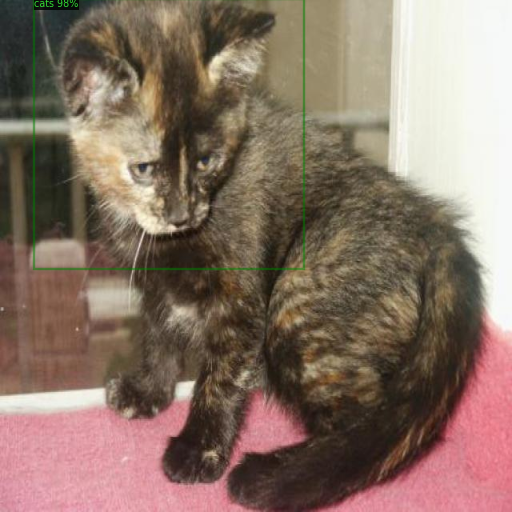

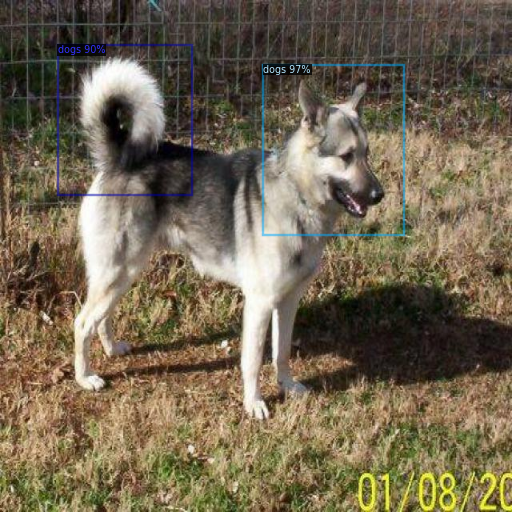

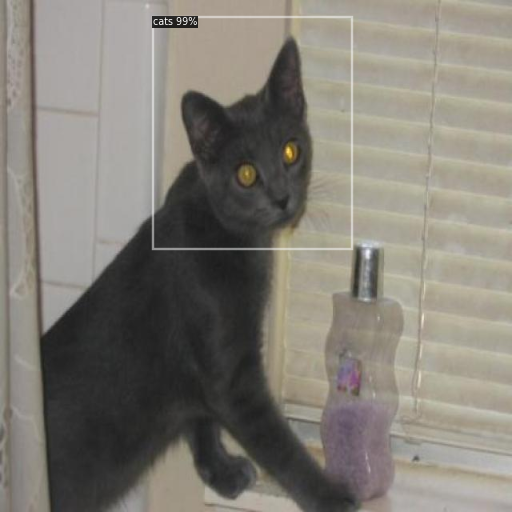

In [13]:
from detectron2.utils.visualizer import ColorMode
import glob

c = 0
for imageName in glob.glob('/content/test/*jpg'):
  c += 1
  if c > 10: 
    break
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
